In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, InputLayer, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
dogs = "PetImages/Dog/" 
cats = "PetImages/Cat/"
dirs = [dogs, cats]

BATCH_SIZE = 200
EPOCHS = 50

In [3]:
#Remove files which might be corrupted
for d in dirs:
    for file in os.listdir(d):
        size = os.path.getsize(d+file)
        if size < 1000:
            os.remove(d+file) 

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    "PetImages",
    target_size=(150,150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    "PetImages", # same directory as training data
    target_size=(150,150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 19996 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [5]:
def create_model():
    model = Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    # The second convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The third convolution
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The fourth convolution
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    Flatten(),
    Dropout(0.5),
    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
    ])
    model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model

In [6]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [46]:
history = model.fit(train_generator, epochs=EPOCHS, steps_per_epoch=(train_generator.samples/BATCH_SIZE), validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/50
 2/99 [..............................] - ETA: 10s - loss: 3.4240 - accuracy: 0.5075 

C:\Users\USER\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))


99/99 [==============================] - 99s 974ms/step - loss: 0.7682 - accuracy: 0.5274 - val_loss: 0.6713 - val_accuracy: 0.6150
Epoch 2/50
99/99 [==============================] - 40s 398ms/step - loss: 0.6703 - accuracy: 0.5930 - val_loss: 0.6590 - val_accuracy: 0.6000
Epoch 3/50
99/99 [==============================] - 40s 401ms/step - loss: 0.6105 - accuracy: 0.6754 - val_loss: 0.5716 - val_accuracy: 0.7067
Epoch 4/50
99/99 [==============================] - 40s 401ms/step - loss: 0.5527 - accuracy: 0.7224 - val_loss: 0.4633 - val_accuracy: 0.7833
Epoch 5/50
99/99 [==============================] - 39s 393ms/step - loss: 0.4900 - accuracy: 0.7640 - val_loss: 0.4756 - val_accuracy: 0.7850
Epoch 6/50
99/99 [==============================] - 49s 487ms/step - loss: 0.4401 - accuracy: 0.7960 - val_loss: 0.4316 - val_accuracy: 0.8150
Epoch 7/50
99/99 [==============================] - 45s 451ms/step - loss: 0.3999 - accuracy: 0.8194 - val_loss: 0.3113 - val_accuracy: 0.8600
Epoch 8/50

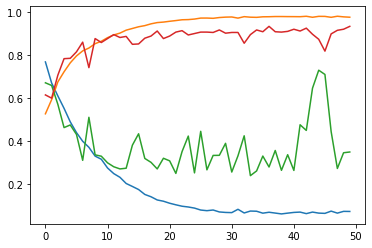

In [58]:
for k in history.history.keys():
    plt.plot(history.history[k])

In [7]:
model = load_model("cat_vs_dog")

In [ ]:
import cv2

imgs = ["additional_img/dog.jpeg","additional_img/cat.jpg"]
def predict_img(src):
    img = cv2.imread(src)
    img = cv2.resize(img, (150,150))
    img = img/255
    img = np.expand_dims(img, 0)
    pred = model.predict(img)
    if np.argmax(pred) == 1:
        return "Dog " +str(pred)
    else:
        return "Cat "+str(pred)

dog = predict_img(imgs[0])
cat = predict_img(imgs[1])

In [9]:
dog

'Dog [[1.5812547e-13 1.0000000e+00]]'

In [10]:
cat

'Cat [[1.0000000e+00 1.9161464e-19]]'